In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%%%%%%%%%%%%%%%%%%%%%%%%%%  

table: Acc   0.05
       Gyro  0.005(0.006)

play:  Acc   0.3(0.7)
       Gyro  0.15
       
stand: Acc   0.2(0.6)
       Gyro  0.06(0.07)
       
%%%%%%%%%%%%%%%%%%%%%%%%%%   

walk:  Acc   2.2(2.2)
       Gyro  1.1(1.1)

run:   Acc   6.1(4.5)
       Gyro  2.0(1.5)
       
%%%%%%%%%%%%%%%%%%%%%%%%%%  

Factor for Acceleration: 15 - 35  (10 -  40)
Factor for Gyroscope:    50 - 150 (35 - 200)

# Table - Play - Stand - Walk

In [20]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/static.csv', index_col = None, header = None)

In [21]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [22]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,0.088531,0.143570,10.226929,0.000000,0.00000,0.000000
1,0.002411,ACC_UN,0.088531,0.143570,10.226929,0.000000,0.00000,0.000000
2,0.005188,ACC_UN,0.088531,0.143570,10.226929,0.000000,0.00000,0.000000
3,0.007599,ACC_UN,0.088531,0.143570,10.226929,0.000000,0.00000,0.000000
4,0.005188,GYRO_UN,-0.067200,0.104446,0.022583,0.007477,-0.00856,-0.010315
5,0.007599,GYRO_UN,-0.067200,0.104446,0.022583,0.007477,-0.00856,-0.010315
6,0.010040,ACC_UN,0.088531,0.143570,10.226929,0.000000,0.00000,0.000000
7,0.010040,GYRO_UN,-0.067200,0.104446,0.022583,0.007477,-0.00856,-0.010315
8,0.012482,ACC_UN,0.088531,0.143570,10.226929,0.000000,0.00000,0.000000
9,0.012482,GYRO_UN,-0.067200,0.104446,0.022583,0.007477,-0.00856,-0.010315


In [23]:
time = std[0].values

### Acceleration

In [24]:
std_acc = std[std[1]==' ACC_UN']

In [25]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [26]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

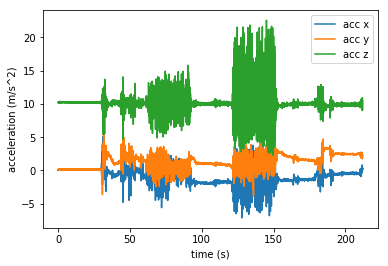

In [27]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [28]:
std_gyro = std[std[1]==' GYRO_UN']

In [29]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [30]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

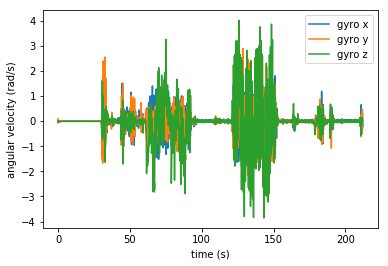

In [31]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

### Stability Detection

In [62]:
g = np.mean(acc_z)
g

10.061778252919034

In [63]:
sig_acc = g
sig_gyro = 0 + 0.5

In [64]:
w_min = 0.3
w_max = 1.1

In [65]:
std_acc  = np.zeros(len(std[0]))
std_gyro = np.zeros(len(std[0]))

In [66]:
std_static  = np.zeros(len(std[0]))

In [67]:
i = 0

while(time[i] + w_max < round(acc_t[-1])):

    std_part = std[std[0] < (time[i] + w_min)]
    std_part = std_part[std_part[0] > time[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 20*sig_acc and std_gyro[i] < 50*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (time[i] + w_max)]
        std_part = std_part[std_part[0] > time[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 20*sig_acc and std_gyro_ < 50*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

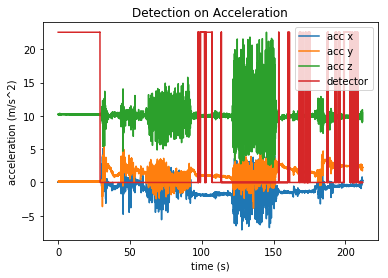

In [70]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(time,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

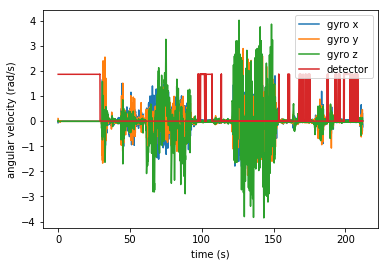

In [71]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(time,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

# 1. Static Put Onto Table

In [15]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/table.csv', index_col = None, header = None)[0:300000]

In [16]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [17]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,0.172287,0.143570,10.133606,0.000000,0.000000,0.000000
1,0.002411,ACC_UN,0.172287,0.143570,10.133606,0.000000,0.000000,0.000000
2,0.000000,GYRO_UN,0.009155,-0.009171,-0.010391,0.007187,-0.008148,-0.009872
3,0.002411,GYRO_UN,0.009155,-0.009171,-0.010391,0.007187,-0.008148,-0.009872
4,0.004822,ACC_UN,0.172287,0.143570,10.133606,0.000000,0.000000,0.000000
5,0.004822,GYRO_UN,0.009155,-0.009171,-0.010391,0.007187,-0.008148,-0.009872
6,0.007263,ACC_UN,0.141174,0.119644,10.157532,0.000000,0.000000,0.000000
7,0.007263,GYRO_UN,0.005478,-0.018326,-0.011612,0.007187,-0.008148,-0.009872
8,0.009735,ACC_UN,0.145966,0.136398,10.140778,0.000000,0.000000,0.000000
9,0.009735,GYRO_UN,0.004883,-0.017105,-0.012222,0.007187,-0.008148,-0.009872


In [18]:
time = std[0].values

### Acceleration

In [19]:
std_acc = std[std[1]==' ACC_UN']

In [20]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [21]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

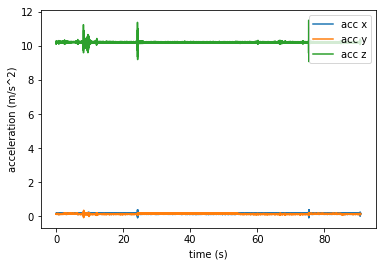

In [22]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [23]:
std_gyro = std[std[1]==' GYRO_UN']

In [24]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [25]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

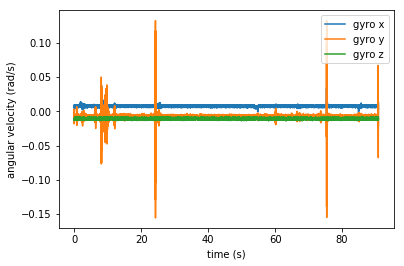

In [26]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

### Stability Detection

In [44]:
g = np.mean(acc_z)
g

10.226603368022488

In [45]:
sig_acc = g
sig_gyro = 0 + 0.5

In [46]:
w_min = 0.3
w_max = 1.1

In [50]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [51]:
std_static  = np.zeros(len(acc_t))

In [52]:
i = 0

while(acc_t[i] + w_max < round(acc_t[-1])):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

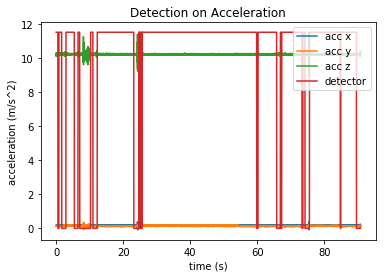

In [54]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

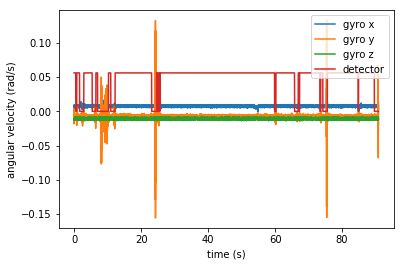

In [55]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

In [57]:
windows = []
start = 0

In [58]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)

In [73]:
tempAcc  = np.zeros((len(windows)/2,3))
tempGyro = np.zeros((len(windows)/2,3))

In [74]:
resAcc  = np.zeros((len(windows)/2,1))
resGyro = np.zeros((len(windows)/2,1))

In [118]:
 for i in range(len(resAcc)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    tempAcc[i,0] = np.std(acc_x[windows[2*i]:windows[2*i+1]])
    tempAcc[i,1] = np.std(acc_y[windows[2*i]:windows[2*i+1]])
    tempAcc[i,2] = np.std(acc_z[windows[2*i]:windows[2*i+1]])
    
    resAcc[i] = np.sqrt(tempAcc[i,0]**2 + tempAcc[i,1]**2 + tempAcc[i,2]**2)
    
    tempGyro[i,0] = np.std(gyro_x[windows[2*i]:windows[2*i+1]])
    tempGyro[i,1] = np.std(gyro_y[windows[2*i]:windows[2*i+1]])
    tempGyro[i,2] = np.std(gyro_z[windows[2*i]:windows[2*i+1]])
    
    resGyro[i] = np.sqrt(tempGyro[i,0]**2 + tempGyro[i,1]**2 + tempGyro[i,2]**2)

### Results

In [98]:
xAccWhole = np.std(acc_x)
yAccWhole = np.std(acc_y)
zAccWhole = np.std(acc_z)
    
resAccWhole = np.sqrt(xAccWhole**2 + yAccWhole**2 + zAccWhole**2)
print('maxAccSTD', resAccWhole)

('maxAccSTD', 0.05623507693670666)


In [81]:
print('maxAccSTD', max(resAcc))

('maxAccSTD', array([0.04551381]))


In [99]:
xGyroWhole = np.std(gyro_x)
yGyroWhole = np.std(gyro_y)
zGyroWhole = np.std(gyro_z)
    
resGyroWhole = np.sqrt(xGyroWhole**2 + yGyroWhole**2 + zGyroWhole**2)
print('maxGyroSTD', resGyroWhole)

('maxGyroSTD', 0.005945905482527273)


In [82]:
print('maxGyroSTD', max(resGyro))

('maxGyroSTD', array([0.00486888]))


# 2 Play Cellphone

In [100]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/play.csv', index_col = None, header = None)[0:100000]

In [101]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [102]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,0.366104,3.684952,8.939590,0.000000,0.00000,0.000000
1,0.002411,ACC_UN,0.366104,3.684952,8.939590,0.000000,0.00000,0.000000
2,0.004822,ACC_UN,0.366104,3.684952,8.939590,0.000000,0.00000,0.000000
3,0.000000,GYRO_UN,0.004883,-0.005493,-0.010391,0.007431,-0.00827,-0.010651
4,0.002411,GYRO_UN,0.004883,-0.005493,-0.010391,0.007431,-0.00827,-0.010651
5,0.004822,GYRO_UN,0.004883,-0.005493,-0.010391,0.007431,-0.00827,-0.010651
6,0.007263,ACC_UN,0.366104,3.684952,8.939590,0.000000,0.00000,0.000000
7,0.007263,GYRO_UN,0.004883,-0.005493,-0.010391,0.007431,-0.00827,-0.010651
8,0.009735,ACC_UN,0.246460,3.610764,9.992432,0.000000,0.00000,0.000000
9,0.009735,GYRO_UN,-0.155167,0.072067,-0.020157,0.007431,-0.00827,-0.010651


In [103]:
time = std[0].values

### Acceleration

In [104]:
std_acc = std[std[1]==' ACC_UN']

In [105]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [106]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

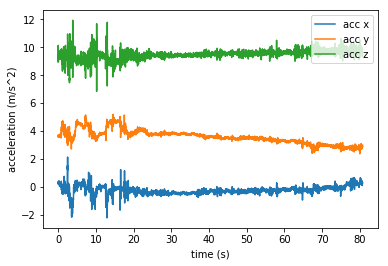

In [107]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [108]:
std_gyro = std[std[1]==' GYRO_UN']

In [109]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [110]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

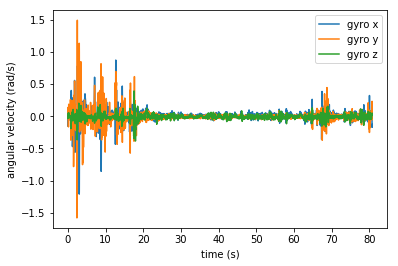

In [111]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [112]:
g = np.mean(acc_z)
g

9.503968404480991

In [113]:
sig_acc = g
sig_gyro = 0 + 0.5

In [114]:
w_min = 0.3
w_max = 1.1

In [119]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [121]:
std_static  = np.zeros(len(acc_t))

In [122]:
i = 0

while(acc_t[i] + w_max < round(acc_t[-1] - 1)):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

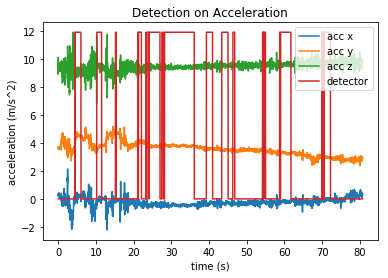

In [124]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

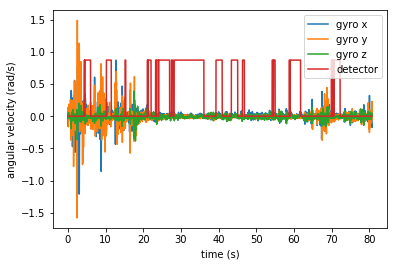

In [126]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(gyro_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

In [127]:
windows = []
start = 0

In [128]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)

In [129]:
tempAcc  = np.zeros((len(windows)/2,3))
tempGyro = np.zeros((len(windows)/2,3))

In [130]:
resAcc  = np.zeros((len(windows)/2,1))
resGyro = np.zeros((len(windows)/2,1))

In [131]:
 for i in range(len(resAcc)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    tempAcc[i,0] = np.std(acc_x[windows[2*i]:windows[2*i+1]])
    tempAcc[i,1] = np.std(acc_y[windows[2*i]:windows[2*i+1]])
    tempAcc[i,2] = np.std(acc_z[windows[2*i]:windows[2*i+1]])
    
    resAcc[i] = np.sqrt(tempAcc[i,0]**2 + tempAcc[i,1]**2 + tempAcc[i,2]**2)
    
    tempGyro[i,0] = np.std(gyro_x[windows[2*i]:windows[2*i+1]])
    tempGyro[i,1] = np.std(gyro_y[windows[2*i]:windows[2*i+1]])
    tempGyro[i,2] = np.std(gyro_z[windows[2*i]:windows[2*i+1]])
    
    resGyro[i] = np.sqrt(tempGyro[i,0]**2 + tempGyro[i,1]**2 + tempGyro[i,2]**2)

# Results

In [132]:
xAccWhole = np.std(acc_x)
yAccWhole = np.std(acc_y)
zAccWhole = np.std(acc_z)
    
resAccWhole = np.sqrt(xAccWhole**2 + yAccWhole**2 + zAccWhole**2)
print('maxAccSTD', resAccWhole)

('maxAccSTD', 0.6516418867302877)


In [133]:
print('maxAccSTD', max(resAcc))

('maxAccSTD', array([0.31821282]))


In [134]:
xGyroWhole = np.std(gyro_x)
yGyroWhole = np.std(gyro_y)
zGyroWhole = np.std(gyro_z)
    
resGyroWhole = np.sqrt(xGyroWhole**2 + yGyroWhole**2 + zGyroWhole**2)
print('maxGyroSTD', resGyroWhole)

('maxGyroSTD', 0.15048727239644358)


In [135]:
print('maxGyroSTD', max(resGyro))

('maxGyroSTD', array([0.14568427]))


# 3 Stand and Hold Cellphone

In [136]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/stand.csv', index_col = None, header = None)[0:100000]

In [137]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [138]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,-0.387634,1.655838,10.267609,0.000000,0.00000,0.000000
1,0.002411,ACC_UN,-0.387634,1.655838,10.267609,0.000000,0.00000,0.000000
2,0.004852,ACC_UN,-0.387634,1.655838,10.267609,0.000000,0.00000,0.000000
3,0.000000,GYRO_UN,-0.063538,0.045807,-0.022003,0.007431,-0.00827,-0.010651
4,0.002411,GYRO_UN,-0.063538,0.045807,-0.022003,0.007431,-0.00827,-0.010651
5,0.004852,GYRO_UN,-0.063538,0.045807,-0.022003,0.007431,-0.00827,-0.010651
6,0.007294,ACC_UN,-0.387634,1.655838,10.267609,0.000000,0.00000,0.000000
7,0.007294,GYRO_UN,-0.063538,0.045807,-0.022003,0.007431,-0.00827,-0.010651
8,0.009735,ACC_UN,-0.854233,1.631912,10.660019,0.000000,0.00000,0.000000
9,0.009735,GYRO_UN,0.050079,0.149033,0.075729,0.007431,-0.00827,-0.010651


In [139]:
time = std[0].values

### Acceleration

In [141]:
std_acc = std[std[1]==' ACC_UN']

In [142]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [143]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

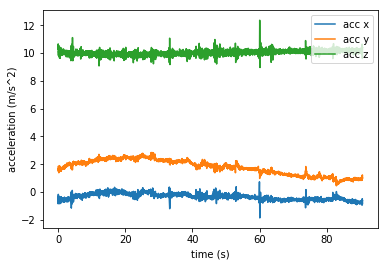

In [144]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [145]:
std_gyro = std[std[1]==' GYRO_UN']

In [146]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [147]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

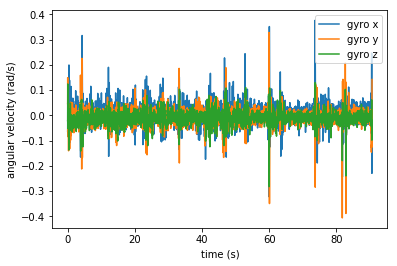

In [148]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

### Stability Detection

In [149]:
g = np.mean(acc_z)
g

10.037088260039395

In [150]:
sig_acc = g
sig_gyro = 0 + 0.5

In [151]:
w_min = 0.3
w_max = 1.1

In [152]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [153]:
std_static  = np.zeros(len(acc_t))

In [154]:
i = 0

while(acc_t[i] + w_max < round(acc_t[-1] - 1)):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

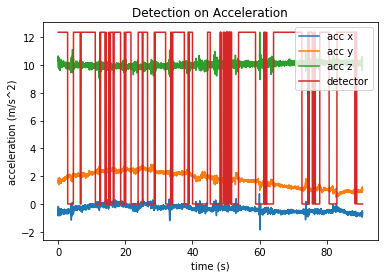

In [155]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

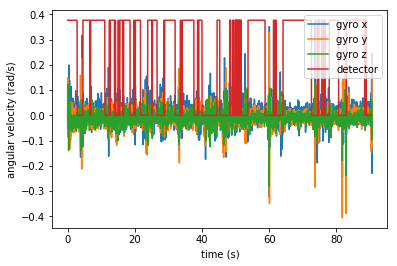

In [156]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(gyro_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

In [157]:
windows = []
start = 0

In [158]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)

In [159]:
tempAcc  = np.zeros((len(windows)/2,3))
tempGyro = np.zeros((len(windows)/2,3))

In [160]:
resAcc  = np.zeros((len(windows)/2,1))
resGyro = np.zeros((len(windows)/2,1))

In [161]:
 for i in range(len(resAcc)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    tempAcc[i,0] = np.std(acc_x[windows[2*i]:windows[2*i+1]])
    tempAcc[i,1] = np.std(acc_y[windows[2*i]:windows[2*i+1]])
    tempAcc[i,2] = np.std(acc_z[windows[2*i]:windows[2*i+1]])
    
    resAcc[i] = np.sqrt(tempAcc[i,0]**2 + tempAcc[i,1]**2 + tempAcc[i,2]**2)
    
    tempGyro[i,0] = np.std(gyro_x[windows[2*i]:windows[2*i+1]])
    tempGyro[i,1] = np.std(gyro_y[windows[2*i]:windows[2*i+1]])
    tempGyro[i,2] = np.std(gyro_z[windows[2*i]:windows[2*i+1]])
    
    resGyro[i] = np.sqrt(tempGyro[i,0]**2 + tempGyro[i,1]**2 + tempGyro[i,2]**2)

# Results

In [162]:
xAccWhole = np.std(acc_x)
yAccWhole = np.std(acc_y)
zAccWhole = np.std(acc_z)
    
resAccWhole = np.sqrt(xAccWhole**2 + yAccWhole**2 + zAccWhole**2)
print('maxAccSTD', resAccWhole)

('maxAccSTD', 0.6254365357595154)


In [163]:
print('maxAccSTD', max(resAcc))

('maxAccSTD', array([0.22569792]))


In [164]:
xGyroWhole = np.std(gyro_x)
yGyroWhole = np.std(gyro_y)
zGyroWhole = np.std(gyro_z)
    
resGyroWhole = np.sqrt(xGyroWhole**2 + yGyroWhole**2 + zGyroWhole**2)
print('maxGyroSTD', resGyroWhole)

('maxGyroSTD', 0.06209261054756258)


In [165]:
print('maxGyroSTD', max(resGyro))

('maxGyroSTD', array([0.06873358]))


# 4 Walk Holding Cellphone

In [166]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/walk.csv', index_col = None, header = None)[0:100000]

In [167]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [168]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,0.658020,1.569687,9.638290,0.000000,0.00000,0.000000
1,0.002411,ACC_UN,0.658020,1.569687,9.638290,0.000000,0.00000,0.000000
2,0.004852,ACC_UN,0.658020,1.569687,9.638290,0.000000,0.00000,0.000000
3,0.000000,GYRO_UN,0.129486,0.086121,0.021362,0.007431,-0.00827,-0.010651
4,0.002411,GYRO_UN,0.129486,0.086121,0.021362,0.007431,-0.00827,-0.010651
5,0.004852,GYRO_UN,0.129486,0.086121,0.021362,0.007431,-0.00827,-0.010651
6,0.007294,ACC_UN,0.658020,1.569687,9.638290,0.000000,0.00000,0.000000
7,0.007294,GYRO_UN,0.129486,0.086121,0.021362,0.007431,-0.00827,-0.010651
8,0.009735,ACC_UN,0.591034,1.452438,10.509277,0.000000,0.00000,0.000000
9,0.009735,GYRO_UN,-0.114838,0.094055,-0.274902,0.007431,-0.00827,-0.010651


In [169]:
time = std[0].values

### Acceleration

In [170]:
std_acc = std[std[1]==' ACC_UN']

In [171]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [172]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

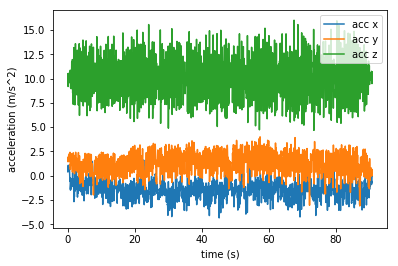

In [173]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [174]:
std_gyro = std[std[1]==' GYRO_UN']

In [175]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [176]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

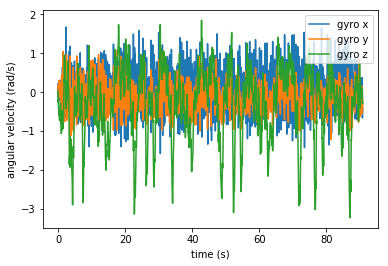

In [177]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [178]:
g = np.mean(acc_z)
g

10.058740292726212

In [179]:
sig_acc = g
sig_gyro = 0 + 0.5

In [180]:
w_min = 0.3
w_max = 1.1

In [181]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [182]:
std_static  = np.zeros(len(acc_t))

In [183]:
i = 0

while(acc_t[i] + w_max < round(time[-1] - 1)):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

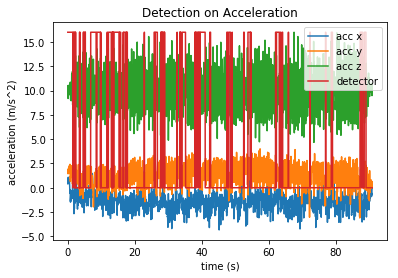

In [184]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

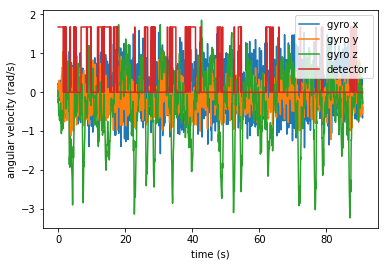

In [185]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

In [186]:
windows = []
start = 0

In [187]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)

In [188]:
tempAcc  = np.zeros((len(windows)/2,3))
tempGyro = np.zeros((len(windows)/2,3))

In [189]:
resAcc  = np.zeros((len(windows)/2,1))
resGyro = np.zeros((len(windows)/2,1))

In [190]:
 for i in range(len(resAcc)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    tempAcc[i,0] = np.std(acc_x[windows[2*i]:windows[2*i+1]])
    tempAcc[i,1] = np.std(acc_y[windows[2*i]:windows[2*i+1]])
    tempAcc[i,2] = np.std(acc_z[windows[2*i]:windows[2*i+1]])
    
    resAcc[i] = np.sqrt(tempAcc[i,0]**2 + tempAcc[i,1]**2 + tempAcc[i,2]**2)
    
    tempGyro[i,0] = np.std(gyro_x[windows[2*i]:windows[2*i+1]])
    tempGyro[i,1] = np.std(gyro_y[windows[2*i]:windows[2*i+1]])
    tempGyro[i,2] = np.std(gyro_z[windows[2*i]:windows[2*i+1]])
    
    resGyro[i] = np.sqrt(tempGyro[i,0]**2 + tempGyro[i,1]**2 + tempGyro[i,2]**2)

# Results

In [191]:
xAccWhole = np.std(acc_x)
yAccWhole = np.std(acc_y)
zAccWhole = np.std(acc_z)
    
resAccWhole = np.sqrt(xAccWhole**2 + yAccWhole**2 + zAccWhole**2)
print('maxAccSTD', resAccWhole)

('maxAccSTD', 2.2027827750659053)


In [192]:
print('maxAccSTD', max(resAcc))

('maxAccSTD', array([2.21277851]))


In [193]:
xGyroWhole = np.std(gyro_x)
yGyroWhole = np.std(gyro_y)
zGyroWhole = np.std(gyro_z)
    
resGyroWhole = np.sqrt(xGyroWhole**2 + yGyroWhole**2 + zGyroWhole**2)
print('maxGyroSTD', resGyroWhole)

('maxGyroSTD', 1.057153116253632)


In [194]:
print('maxGyroSTD', max(resGyro))

('maxGyroSTD', array([1.1049773]))


# 4 Run Holding Cellphone

In [195]:
std = pd.read_csv('/Users/Joanna/Documents/PhD/Polaris_Wireless/NLE/Git/new/3d-tracking-at-gt-main/Station_Detection/meas/run.csv', index_col = None, header = None)[0:100000]

In [196]:
std[0]=(1.0*(std[0] - std[0][0]) /1000000000).astype('float');

In [197]:
std.head(10)

,0,1,2,3,4,5,6,7
0,0.000000,ACC_UN,0.602997,1.588837,10.868195,0.000000,0.00000,0.000000
1,0.002411,ACC_UN,0.602997,1.588837,10.868195,0.000000,0.00000,0.000000
2,0.004822,ACC_UN,0.602997,1.588837,10.868195,0.000000,0.00000,0.000000
3,0.000000,GYRO_UN,0.021362,0.162476,-0.177155,0.007431,-0.00827,-0.010651
4,0.002411,GYRO_UN,0.021362,0.162476,-0.177155,0.007431,-0.00827,-0.010651
5,0.004822,GYRO_UN,0.021362,0.162476,-0.177155,0.007431,-0.00827,-0.010651
6,0.007263,ACC_UN,0.602997,1.588837,10.868195,0.000000,0.00000,0.000000
7,0.007263,GYRO_UN,0.021362,0.162476,-0.177155,0.007431,-0.00827,-0.010651
8,0.009735,ACC_UN,0.650848,1.885544,10.265213,0.000000,0.00000,0.000000
9,0.009735,GYRO_UN,0.117889,-0.032990,-0.463043,0.007431,-0.00827,-0.010651


### Acceleration

In [198]:
std_acc = std[std[1]==' ACC_UN']

In [199]:
acc_x = std_acc[2].values
acc_y = std_acc[3].values
acc_z = std_acc[4].values

In [200]:
acc_t = std_acc[0].values

Text(0,0.5,u'acceleration (m/s^2)')

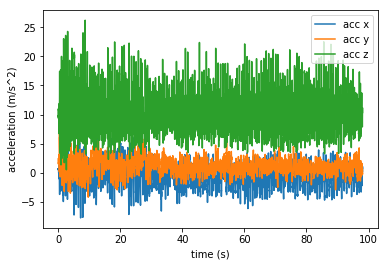

In [201]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.legend(['acc x','acc y','acc z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')

### Gyroscope

In [202]:
std_gyro = std[std[1]==' GYRO_UN']

In [203]:
gyro_x = std_gyro[2].values
gyro_y = std_gyro[3].values
gyro_z = std_gyro[4].values

In [204]:
gyro_t = std_gyro[0].values

Text(0,0.5,u'angular velocity (rad/s)')

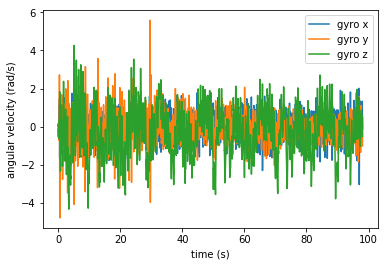

In [205]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.legend(['gyro x','gyro y','gyro z'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

## Stability Detection

In [206]:
g = np.mean(acc_z)
g

10.17950062387785

In [207]:
sig_acc = g
sig_gyro = 0 + 0.5

In [208]:
w_min = 0.3
w_max = 1.1

In [209]:
std_acc  = np.zeros(len(acc_t))
std_gyro = np.zeros(len(acc_t))

In [210]:
std_static  = np.zeros(len(acc_t))

In [211]:
i = 0

while(acc_t[i] + w_max < round(time[-1] - 1)):

    std_part = std[std[0] < (acc_t[i] + w_min)]
    std_part = std_part[std_part[0] > acc_t[i]]
    
    # get acceleration in the window range
    
    acc_part = std_part[std_part[1]==' ACC_UN']
    acc_part_x = acc_part[2].values
    acc_part_y = acc_part[3].values
    acc_part_z = acc_part[4].values
    
    
    std_acc_x = np.std(acc_part_x) # std of accx
    std_acc_y = np.std(acc_part_y) # std of accy
    std_acc_z = np.std(acc_part_z) # std of accz

    std_acc[i] = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
    
    # get gyroscope in the window range
    
    gyro_part = std_part[std_part[1]==' GYRO_UN']
    gyro_part_x = gyro_part[2].values
    gyro_part_y = gyro_part[3].values
    gyro_part_z = gyro_part[4].values
    
    std_gyro_x = np.std(gyro_part_x) # std of gyrox
    std_gyro_y = np.std(gyro_part_y) # std of gyrox
    std_gyro_z = np.std(gyro_part_z) # std of gyrox

    std_gyro[i] = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
    
    if std_acc[i] < 2*sig_acc and std_gyro[i] < 3*sig_gyro:
        
        # increase to max window size
        
        std_part = std[std[0] < (acc_t[i] + w_max)]
        std_part = std_part[std_part[0] > acc_t[i]]

        # accleration in the max window rnage
        acc_part = std_part[std_part[1]==' ACC_UN']
        acc_part_x = acc_part[2].values
        acc_part_y = acc_part[3].values
        acc_part_z = acc_part[4].values
        
        std_acc_x = np.std(acc_part_x) # std of accx
        std_acc_y = np.std(acc_part_y) # std of accy
        std_acc_z = np.std(acc_part_z) # std of accz

        std_acc_ = np.sqrt(std_acc_x**2 + std_acc_y**2 + std_acc_z**2)
        
        # gyroscope in the max window range
        
        gyro_part = std_part[std_part[1]==' GYRO_UN']
        gyro_part_x = gyro_part[2].values
        gyro_part_y = gyro_part[3].values
        gyro_part_z = gyro_part[4].values
        
        std_gyro_x = np.std(gyro_part_x) # std of gyrox
        std_gyro_y = np.std(gyro_part_y) # std of gyrox
        std_gyro_z = np.std(gyro_part_z) # std of gyrox

        std_gyro_ = np.sqrt(std_gyro_x**2 + std_gyro_y**2 + std_gyro_z**2)
    
        
        
        ## update parameters
        if std_acc_ < 2*sig_acc and std_gyro_ < 3*sig_gyro:
            
            if std_acc_ < sig_acc:
                sig_acc = std_acc_
                
            if std_gyro_ < sig_gyro:
                sig_gyro = std_gyro_
            
            std_static[i] = 1
        
    
    ##############

    i = i + 1

Text(0.5,1,u'Detection on Acceleration')

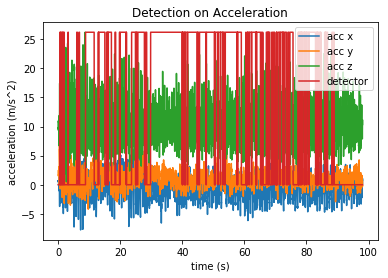

In [212]:
plt.plot(acc_t, acc_x)
plt.plot(acc_t, acc_y)
plt.plot(acc_t, acc_z)
plt.plot(acc_t,std_static*np.max(acc_z))
plt.legend(['acc x','acc y','acc z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('acceleration (m/s^2)')
plt.title('Detection on Acceleration')

Text(0,0.5,u'angular velocity (rad/s)')

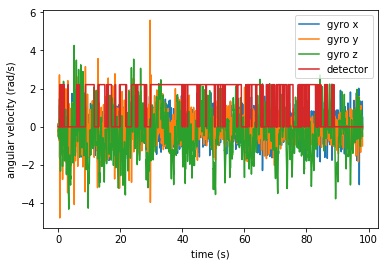

In [213]:
plt.plot(gyro_t, gyro_x)
plt.plot(gyro_t, gyro_y)
plt.plot(gyro_t, gyro_z)
plt.plot(acc_t,std_static*np.max(gyro_x))
plt.legend(['gyro x','gyro y','gyro z','detector'], loc = 'upper right')
plt.xlabel('time (s)')
plt.ylabel('angular velocity (rad/s)')

In [214]:
windows = []
start = 0

In [215]:
for i in range(len(std_static)-1):
    if (std_static[i+1] - std_static[i]) == 1:
        start = i + 1
       
    if (std_static[i+1] - std_static[i]) == -1:
        endd = i
    
        if (endd - start) > 15:
                windows.append(start)
                windows.append(endd)

In [216]:
tempAcc  = np.zeros((len(windows)/2,3))
tempGyro = np.zeros((len(windows)/2,3))

In [217]:
resAcc  = np.zeros((len(windows)/2,1))
resGyro = np.zeros((len(windows)/2,1))

In [218]:
 for i in range(len(resAcc)):
    #print('window1', [windows[2*i], windows[2*i+1]])
    tempAcc[i,0] = np.std(acc_x[windows[2*i]:windows[2*i+1]])
    tempAcc[i,1] = np.std(acc_y[windows[2*i]:windows[2*i+1]])
    tempAcc[i,2] = np.std(acc_z[windows[2*i]:windows[2*i+1]])
    
    resAcc[i] = np.sqrt(tempAcc[i,0]**2 + tempAcc[i,1]**2 + tempAcc[i,2]**2)
    
    tempGyro[i,0] = np.std(gyro_x[windows[2*i]:windows[2*i+1]])
    tempGyro[i,1] = np.std(gyro_y[windows[2*i]:windows[2*i+1]])
    tempGyro[i,2] = np.std(gyro_z[windows[2*i]:windows[2*i+1]])
    
    resGyro[i] = np.sqrt(tempGyro[i,0]**2 + tempGyro[i,1]**2 + tempGyro[i,2]**2)

# Results

In [219]:
xAccWhole = np.std(acc_x)
yAccWhole = np.std(acc_y)
zAccWhole = np.std(acc_z)
    
resAccWhole = np.sqrt(xAccWhole**2 + yAccWhole**2 + zAccWhole**2)
print('maxAccSTD', resAccWhole)

('maxAccSTD', 4.476532953344359)


In [220]:
print('maxAccSTD', max(resAcc)) 

('maxAccSTD', array([6.11103197]))


In [221]:
xGyroWhole = np.std(gyro_x)
yGyroWhole = np.std(gyro_y)
zGyroWhole = np.std(gyro_z)
    
resGyroWhole = np.sqrt(xGyroWhole**2 + yGyroWhole**2 + zGyroWhole**2)
print('maxGyroSTD', resGyroWhole)

('maxGyroSTD', 1.5270242264868297)


In [222]:
print('maxGyroSTD', max(resGyro))

('maxGyroSTD', array([1.97189454]))
